In [1]:
import wisps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
import splat

In [7]:
wisps.datasets['candidates'].grism_id.sample(n=1)

120    goodss-01-G141_45889
Name: grism_id, dtype: object

In [4]:
s=wisps.Spectrum(filename='goodss-01-G141_45889')

In [18]:
std=splat.STDS_DWARF_SPEX[s.classify_by_standard()[0]]

In [19]:
std.normalize()

In [27]:
mask1=np.logical_and(s.wave>1.15, s.wave<1.65)
mask2=np.logical_and(std.wave.value>1.15, std.wave.value<1.65)

In [30]:
from scipy.interpolate import interp1d

In [34]:
len(s.wave[mask1])

210

In [31]:
f = interp1d(s.wave[mask1], s.flux[mask1],bounds_error=False,fill_value=0.)

In [33]:
len(f(std.wave[mask2]))

119

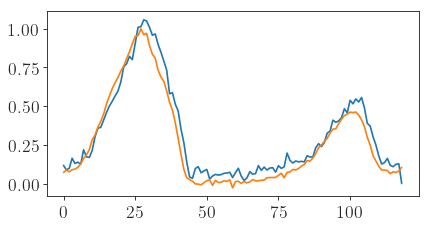

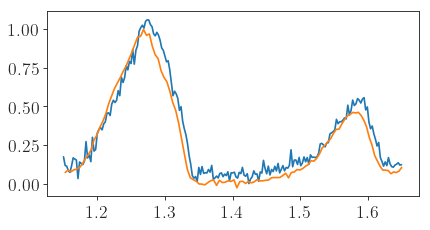

In [29]:
plt.plot(s.wave[mask1], s.flux[mask1])
plt.plot(std.wave[mask2], std.flux[mask2])

In [13]:
s.classify_by_standard()

('T7.0', 0.5)

In [57]:
weird=splat.getSpectrum(source_key=splat.splat.STDS_SD_SPEX_KEYS['sdL0.0'])[0]


Retrieving 1 file



In [58]:
norm=splat.STDS_DWARF_SPEX['L0.0']

In [59]:
weird.normalize(waverange=[1.15, 1.65])
norm.normalize(waverange=[1.15, 1.65])

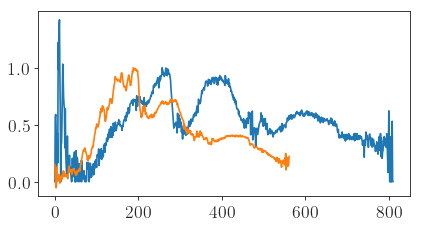

In [61]:
plt.plot(weird.flux)
plt.plot(norm.flux)

In [62]:
len(norm.flux)

562

In [63]:
len(weird.flux)

811

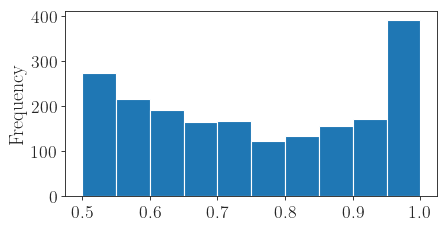

In [68]:
wisps.datasets['all'].f_test.plot(kind='hist')

In [71]:
import pandas as pd

In [76]:
df=pd.read_hdf(wisps.COMBINED_PHOTO_SPECTRO_FILE, key='all_phot_spec_data')

In [77]:
len(df)

270436